In [1]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#Load Libraries:

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras import activations

from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import models
from tensorflow.keras import layers

import cv2
import numpy as np
from tqdm import tqdm
import math
import os

import matplotlib.pyplot as plt

#Load Model:

In [3]:
work_dir = "drive/My Drive/Plant_Leaf_MalayaKew_MK_Dataset/Records/"

In [4]:
checkpointer_name = "weights.MK.D1.TTV.rgb.256p.DataAug.DataFlow.pad0.TL.3D.DenseNet201.wInit.imagenet.TrainableAfter.allDefault.Dense.1024.1024.2048.actF.elu.opt.Adam.drop.0.5.batch16.Flatten.l2.0.001.run_1.hdf5"


In [5]:
model_loaded = load_model(work_dir+checkpointer_name)
print("Loaded "+work_dir+checkpointer_name+".")

Loaded drive/My Drive/Plant_Leaf_MalayaKew_MK_Dataset/Records/weights.MK.D1.TTV.rgb.256p.DataAug.DataFlow.pad0.TL.3D.DenseNet201.wInit.imagenet.TrainableAfter.allDefault.Dense.1024.1024.2048.actF.elu.opt.Adam.drop.0.5.batch16.Flatten.l2.0.001.run_1.hdf5.


In [6]:
model_loaded.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 128, 128, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

#Model Layers:

In [7]:
layer_names = [] # conv4_block48_2_conv, conv3_block12_2_conv

for layer in model_loaded.layers:
  layer_names.append(layer.name)
print(layer_names)

['input_1', 'zero_padding2d', 'conv1/conv', 'conv1/bn', 'conv1/relu', 'zero_padding2d_1', 'pool1', 'conv2_block1_0_bn', 'conv2_block1_0_relu', 'conv2_block1_1_conv', 'conv2_block1_1_bn', 'conv2_block1_1_relu', 'conv2_block1_2_conv', 'conv2_block1_concat', 'conv2_block2_0_bn', 'conv2_block2_0_relu', 'conv2_block2_1_conv', 'conv2_block2_1_bn', 'conv2_block2_1_relu', 'conv2_block2_2_conv', 'conv2_block2_concat', 'conv2_block3_0_bn', 'conv2_block3_0_relu', 'conv2_block3_1_conv', 'conv2_block3_1_bn', 'conv2_block3_1_relu', 'conv2_block3_2_conv', 'conv2_block3_concat', 'conv2_block4_0_bn', 'conv2_block4_0_relu', 'conv2_block4_1_conv', 'conv2_block4_1_bn', 'conv2_block4_1_relu', 'conv2_block4_2_conv', 'conv2_block4_concat', 'conv2_block5_0_bn', 'conv2_block5_0_relu', 'conv2_block5_1_conv', 'conv2_block5_1_bn', 'conv2_block5_1_relu', 'conv2_block5_2_conv', 'conv2_block5_concat', 'conv2_block6_0_bn', 'conv2_block6_0_relu', 'conv2_block6_1_conv', 'conv2_block6_1_bn', 'conv2_block6_1_relu', 'conv

In [8]:
layer_no = -9
print(f"layer_names[{layer_no}] = {layer_names[layer_no]}")

layer_names[-9] = relu


#By Loading Entire Test at Once:

In [9]:
'''
input_path = "drive/My Drive/Plant_Leaf_MalayaKew_MK_Dataset/"
filename = "D2_Plant_Leaf_MalayaKew_MK_impl_1_Original_RGB_test_X.pkl.npy"
#'''

'\ninput_path = "drive/My Drive/Plant_Leaf_MalayaKew_MK_Dataset/"\nfilename = "D2_Plant_Leaf_MalayaKew_MK_impl_1_Original_RGB_test_X.pkl.npy"\n#'

In [10]:
#input_test = np.load(f"{input_path}{filename}", allow_pickle=True)

In [11]:
'''
print(f"input_test.shape = {input_test.shape}")
#'''

'\nprint(f"input_test.shape = {input_test.shape}")\n#'

In [12]:
'''
layer_outputs = [layer.output for layer in model_loaded.layers]
activation_model = models.Model(inputs=model_loaded.input, outputs=layer_outputs)
activations = activation_model.predict(input_test)
#'''

'\nlayer_outputs = [layer.output for layer in model_loaded.layers]\nactivation_model = models.Model(inputs=model_loaded.input, outputs=layer_outputs)\nactivations = activation_model.predict(input_test)\n#'

#By Loading Single at a Time:

In [15]:
root_path = "drive/My Drive/Plant_Leaf_MalayaKew_MK_Dataset/MK/D1/test/"
#num_classes = 44
#list_classes = [f"Class{i+1}" for i in range(num_classes)]
list_classes = [f"Class ({i})" for i in [1,11,22,33,44]]
list_input_path = []
for class_name in list_classes:
    list_input_path.append(f"{root_path}{class_name}/")
print(f"len(list_input_path) = {len(list_input_path)}")

len(list_input_path) = 5


In [16]:
os.listdir(list_input_path[0])[0]

'R_0Class1 (12).jpg'

In [18]:
list_full_paths = []
choose_different_index = 0
for input_path in list_input_path:
    filename = os.listdir(input_path)[choose_different_index]
    choose_different_index += 0
    list_full_paths.append(f"{input_path}{filename}")
print(f"len(list_full_paths) = {len(list_full_paths)}")

len(list_full_paths) = 5


In [19]:
list_full_paths

['drive/My Drive/Plant_Leaf_MalayaKew_MK_Dataset/MK/D1/test/Class (1)/R_0Class1 (12).jpg',
 'drive/My Drive/Plant_Leaf_MalayaKew_MK_Dataset/MK/D1/test/Class (11)/R_135Class11 (3).jpg',
 'drive/My Drive/Plant_Leaf_MalayaKew_MK_Dataset/MK/D1/test/Class (22)/R_0Class22 (14).jpg',
 'drive/My Drive/Plant_Leaf_MalayaKew_MK_Dataset/MK/D1/test/Class (33)/R_0Class33 (2).jpg',
 'drive/My Drive/Plant_Leaf_MalayaKew_MK_Dataset/MK/D1/test/Class (44)/R_0Class44 (1).jpg']

In [20]:
'''
filename = "Class44(8)R315_00277.jpg"

test_image = cv2.imread(f"{input_path}{filename}")
print(f"test_image.shape = {test_image.shape}")

input_test = np.expand_dims(test_image, 0)
print(f"input_test.shape = {input_test.shape}")
#'''

'\nfilename = "Class44(8)R315_00277.jpg"\n\ntest_image = cv2.imread(f"{input_path}{filename}")\nprint(f"test_image.shape = {test_image.shape}")\n\ninput_test = np.expand_dims(test_image, 0)\nprint(f"input_test.shape = {input_test.shape}")\n#'

In [21]:
list_test_images = []

for file_full_path in list_full_paths:
    test_image = cv2.imread(file_full_path)
    print(f"file_full_path: {file_full_path}")
    list_test_images.append(test_image)
    
np_test_images = np.array(list_test_images)
print(f"np_test_images.shape = {np_test_images.shape}")

file_full_path: drive/My Drive/Plant_Leaf_MalayaKew_MK_Dataset/MK/D1/test/Class (1)/R_0Class1 (12).jpg
file_full_path: drive/My Drive/Plant_Leaf_MalayaKew_MK_Dataset/MK/D1/test/Class (11)/R_135Class11 (3).jpg
file_full_path: drive/My Drive/Plant_Leaf_MalayaKew_MK_Dataset/MK/D1/test/Class (22)/R_0Class22 (14).jpg
file_full_path: drive/My Drive/Plant_Leaf_MalayaKew_MK_Dataset/MK/D1/test/Class (33)/R_0Class33 (2).jpg
file_full_path: drive/My Drive/Plant_Leaf_MalayaKew_MK_Dataset/MK/D1/test/Class (44)/R_0Class44 (1).jpg
np_test_images.shape = (5, 256, 256, 3)


#Get Layer Activation Outputs:

In [22]:
layer_outputs = [layer.output for layer in model_loaded.layers]
activation_model = models.Model(inputs=model_loaded.input, outputs=layer_outputs)
#activations = activation_model.predict(input_test)

In [23]:
list_activations = []
for test_image in tqdm(np_test_images):
    activations = activation_model.predict(np.array([test_image]))
    list_activations.append(activations)
print(f"\nlen(list_activations) = {len(list_activations)}")

100%|██████████| 5/5 [00:33<00:00,  6.62s/it]


len(list_activations) = 5


##Visualize:

In [24]:
'''
input_1(256,256,3), conv1/relu(128,128,64), pool2_relu(64,64,256), pool3_relu(32,32,512), pool4_relu(16,16,1792), relu(8,8,1920)
'''
#target_layer_name = "conv3_block12_concat" 
list_target_layer_names = ['input_1', 'conv1/relu', 'pool2_relu', 'pool3_relu', 'pool4_relu', 'relu']
list_layer_indices = []

for target_layer_name in list_target_layer_names:
    for target_layer_index in range(len(layer_names)):
        if layer_names[target_layer_index]==target_layer_name:
            #layer_no = target_layer_index
            list_layer_indices.append(target_layer_index)

#print(f"layer_names[{layer_no}] = {layer_names[layer_no]}")
print(f"list_layer_indices = {list_layer_indices}")

list_layer_indices = [0, 4, 50, 138, 478, 706]


In [25]:
for activations in list_activations:
    print(len(activations))

715
715
715
715
715


In [26]:
'''
current_layer = activations[layer_no]
num_neurons = current_layer.shape[1:][-1]

print(f"current_layer.shape = {current_layer.shape}")
print(f"image_dimension = {current_layer.shape[1:][:-1]}")
print(f"num_neurons = {num_neurons}")
#'''

'\ncurrent_layer = activations[layer_no]\nnum_neurons = current_layer.shape[1:][-1]\n\nprint(f"current_layer.shape = {current_layer.shape}")\nprint(f"image_dimension = {current_layer.shape[1:][:-1]}")\nprint(f"num_neurons = {num_neurons}")\n#'

In [27]:
list_all_activations_layers = []
list_all_num_neurons = []
# list_all_activations_layers -> list_activations_layers -> current_layer -> activations[layer_no]
for activations in list_activations:
    list_activations_layers = []
    list_neurons = []
    for layer_no in list_layer_indices:
        current_layer = activations[layer_no]
        #print(f"current_layer.shape = {current_layer.shape}")
        list_activations_layers.append(current_layer)
        #list_current_layers.append(current_layer)
        list_neurons.append(current_layer.shape[1:][-1])
    list_all_activations_layers.append(list_activations_layers)
    list_all_num_neurons.append(list_neurons)
print(f"len(list_all_activations_layers) = {len(list_all_activations_layers)}")
print(f"len(list_all_activations_layers[0]) = {len(list_all_activations_layers[0])}")
print(f"list_all_activations_layers[0][0] = {list_all_activations_layers[0][0].shape}")
print(f"list_all_num_neurons = {list_all_num_neurons}")
print(f"list_all_num_neurons[0] = {list_all_num_neurons[0]}")

len(list_all_activations_layers) = 5
len(list_all_activations_layers[0]) = 6
list_all_activations_layers[0][0] = (1, 256, 256, 3)
list_all_num_neurons = [[3, 64, 256, 512, 1792, 1920], [3, 64, 256, 512, 1792, 1920], [3, 64, 256, 512, 1792, 1920], [3, 64, 256, 512, 1792, 1920], [3, 64, 256, 512, 1792, 1920]]
list_all_num_neurons[0] = [3, 64, 256, 512, 1792, 1920]


In [28]:
print(f"list_all_activations_layers[0][0] = {list_all_activations_layers[0][0].shape}")
print(f"list_all_activations_layers[0][1] = {list_all_activations_layers[0][1].shape}")
print(f"list_all_activations_layers[0][2] = {list_all_activations_layers[0][2].shape}")
print(f"list_all_activations_layers[0][3] = {list_all_activations_layers[0][3].shape}")
print(f"list_all_activations_layers[0][4] = {list_all_activations_layers[0][4].shape}")
#print(f"list_all_activations_layers[0][5] = {list_all_activations_layers[0][5].shape}")

list_all_activations_layers[0][0] = (1, 256, 256, 3)
list_all_activations_layers[0][1] = (1, 128, 128, 64)
list_all_activations_layers[0][2] = (1, 64, 64, 256)
list_all_activations_layers[0][3] = (1, 32, 32, 512)
list_all_activations_layers[0][4] = (1, 16, 16, 1792)


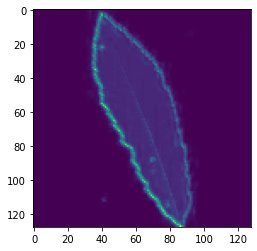

In [29]:
#'''
current_layer = list_all_activations_layers[0][1]
superimposed_activation_image = current_layer[0, :, :, 0]
for activation_image_index in range(1, current_layer.shape[-1]):
    current_activation_image = current_layer[0, :, :, activation_image_index]
    superimposed_activation_image = np.add(superimposed_activation_image, current_activation_image) # elementwise addition
plt.imshow(superimposed_activation_image, cmap='viridis')
#'''

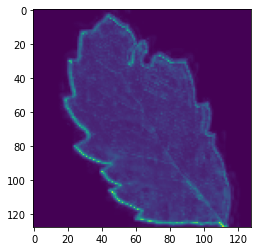

In [30]:
#'''
current_layer = list_all_activations_layers[-1][1]
superimposed_activation_image = current_layer[0, :, :, 0]
for activation_image_index in range(1, current_layer.shape[-1]):
    current_activation_image = current_layer[0, :, :, activation_image_index]
    superimposed_activation_image = np.add(superimposed_activation_image, current_activation_image) # elementwise addition
plt.imshow(superimposed_activation_image, cmap='viridis')
#'''

In [31]:
#plt.matshow(current_layer[0, :, :, -1], cmap ='PiYG')
#plt.matshow(current_layer[0, :, :, -1], cmap ='viridis')

In [32]:
'''
superimposed_activation_image = current_layer[0, :, :, 0]
for activation_image_index in range(1, num_neurons):
    current_activation_image = current_layer[0, :, :, activation_image_index]
    #superimposed_activation_image = np.multiply(superimposed_activation_image, current_activation_image) # elementwise multiplication
    superimposed_activation_image = np.add(superimposed_activation_image, current_activation_image) # elementwise addition
plt.imshow(superimposed_activation_image, cmap='viridis')
#'''

"\nsuperimposed_activation_image = current_layer[0, :, :, 0]\nfor activation_image_index in range(1, num_neurons):\n    current_activation_image = current_layer[0, :, :, activation_image_index]\n    #superimposed_activation_image = np.multiply(superimposed_activation_image, current_activation_image) # elementwise multiplication\n    superimposed_activation_image = np.add(superimposed_activation_image, current_activation_image) # elementwise addition\nplt.imshow(superimposed_activation_image, cmap='viridis')\n#"

In [33]:
'''
superimposed_activation_image = current_layer[0, :, :, 0]
for activation_image_index in range(1, len(num_neurons)):
    current_activation_image = current_layer[0, :, :, activation_image_index]
    superimposed_activation_image = np.add(superimposed_activation_image, current_activation_image) # elementwise addition
plt.imshow(superimposed_activation_image, cmap='viridis')
#'''

"\nsuperimposed_activation_image = current_layer[0, :, :, 0]\nfor activation_image_index in range(1, len(num_neurons)):\n    current_activation_image = current_layer[0, :, :, activation_image_index]\n    superimposed_activation_image = np.add(superimposed_activation_image, current_activation_image) # elementwise addition\nplt.imshow(superimposed_activation_image, cmap='viridis')\n#"

In [34]:
#'''
# list_all_activations_layers -> list_activations_layers -> current_layer -> activations[layer_no]
#num_activation_per_test_image = len(list_target_layer_names)
list_all_superimposed_activation_image = []
for list_activations_layers_index in range(len(list_all_activations_layers)):
    list_activations_layers = list_all_activations_layers[list_activations_layers_index]
    list_current_num_neurons = list_all_num_neurons[list_activations_layers_index]
    #print(f"list_activations_layers_index = {list_activations_layers_index}")
    #print(f"list_all_num_neurons = {list_all_num_neurons}")
    #print(f"list_current_num_neurons = {list_current_num_neurons}")

    list_superimposed_activation_image = []
    for activations_layer_index in range(len(list_activations_layers)):
        activations_layers = list_activations_layers[activations_layer_index]
        #print(f"activations_layers.shape = {activations_layers.shape}")
        num_neurons = list_current_num_neurons[activations_layer_index]

        superimposed_activation_image = activations_layers[0, :, :, 0]
        for activation_image_index in range(1, num_neurons):
            current_activation_image = activations_layers[0, :, :, activation_image_index]
            superimposed_activation_image = np.add(superimposed_activation_image, current_activation_image) # elementwise addition   
        #print(f"superimposed_activation_image.shape = {superimposed_activation_image.shape}")
        list_superimposed_activation_image.append(superimposed_activation_image)
        #print(f"list_superimposed_activation_image[0].shape = {list_superimposed_activation_image[0].shape}")
    list_all_superimposed_activation_image.append(list_superimposed_activation_image)  
    #print(f"list_all_superimposed_activation_image[0][0].shape = {list_all_superimposed_activation_image[0][0].shape}")  
#plt.imshow(superimposed_activation_image, cmap='viridis')

print(f"len(list_all_superimposed_activation_image) = {len(list_all_superimposed_activation_image)}")
print(f"len(list_all_superimposed_activation_image[0]) = {len(list_all_superimposed_activation_image[0])}")
print(f"len(list_all_superimposed_activation_image[0][0]) = {len(list_all_superimposed_activation_image[0][0])}")
print(f"list_all_superimposed_activation_image[0][0].shape = {list_all_superimposed_activation_image[0][0].shape}")
#'''

len(list_all_superimposed_activation_image) = 5
len(list_all_superimposed_activation_image[0]) = 6
len(list_all_superimposed_activation_image[0][0]) = 256
list_all_superimposed_activation_image[0][0].shape = (256, 256)


In [35]:
'''
interpolation = cv2.INTER_LINEAR # INTER_LINEAR, INTER_CUBIC, INTER_NEAREST
# list_all_activations_layers -> list_activations_layers -> current_layer -> activations[layer_no]
#num_activation_per_test_image = len(list_target_layer_names)
list_all_superimposed_activation_image = []
for list_activations_layers_index in range(len(list_all_activations_layers)):
    list_activations_layers = list_all_activations_layers[list_activations_layers_index]
    list_current_num_neurons = list_all_num_neurons[list_activations_layers_index]
    #print(f"list_activations_layers_index = {list_activations_layers_index}")
    #print(f"list_all_num_neurons = {list_all_num_neurons}")
    #print(f"list_current_num_neurons = {list_current_num_neurons}")

    list_superimposed_activation_image = []
    for activations_layer_index in range(len(list_activations_layers)):
        activations_layers = list_activations_layers[activations_layer_index]
        #print(f"activations_layers.shape = {activations_layers.shape}")
        num_neurons = list_current_num_neurons[activations_layer_index]

        superimposed_activation_image = activations_layers[0, :, :, 0]
        superimposed_activation_image_resized = cv2.resize(superimposed_activation_image, (256,256), interpolation = interpolation)
        for activation_image_index in range(1, num_neurons):
            current_activation_image = activations_layers[0, :, :, activation_image_index]
            #superimposed_activation_image = np.add(superimposed_activation_image, current_activation_image) # elementwise addition 

            current_activation_image_resized = cv2.resize(current_activation_image, (256,256), interpolation = interpolation)
            superimposed_activation_image_resized = np.add(superimposed_activation_image_resized, current_activation_image_resized) # elementwise addition 
  
        #print(f"superimposed_activation_image.shape = {superimposed_activation_image.shape}")
        #list_superimposed_activation_image.append(superimposed_activation_image)
        list_superimposed_activation_image.append(superimposed_activation_image_resized)
        #print(f"list_superimposed_activation_image[0].shape = {list_superimposed_activation_image[0].shape}")
    list_all_superimposed_activation_image.append(list_superimposed_activation_image)  
    #print(f"list_all_superimposed_activation_image[0][0].shape = {list_all_superimposed_activation_image[0][0].shape}")  
#plt.imshow(superimposed_activation_image, cmap='viridis')

print(f"len(list_all_superimposed_activation_image) = {len(list_all_superimposed_activation_image)}")
print(f"len(list_all_superimposed_activation_image[0]) = {len(list_all_superimposed_activation_image[0])}")
print(f"len(list_all_superimposed_activation_image[0][0]) = {len(list_all_superimposed_activation_image[0][0])}")
print(f"list_all_superimposed_activation_image[0][0].shape = {list_all_superimposed_activation_image[0][0].shape}")
print(f"list_all_superimposed_activation_image[0][-1].shape = {list_all_superimposed_activation_image[0][-1].shape}")
#'''

'\ninterpolation = cv2.INTER_LINEAR # INTER_LINEAR, INTER_CUBIC, INTER_NEAREST\n# list_all_activations_layers -> list_activations_layers -> current_layer -> activations[layer_no]\n#num_activation_per_test_image = len(list_target_layer_names)\nlist_all_superimposed_activation_image = []\nfor list_activations_layers_index in range(len(list_all_activations_layers)):\n    list_activations_layers = list_all_activations_layers[list_activations_layers_index]\n    list_current_num_neurons = list_all_num_neurons[list_activations_layers_index]\n    #print(f"list_activations_layers_index = {list_activations_layers_index}")\n    #print(f"list_all_num_neurons = {list_all_num_neurons}")\n    #print(f"list_current_num_neurons = {list_current_num_neurons}")\n\n    list_superimposed_activation_image = []\n    for activations_layer_index in range(len(list_activations_layers)):\n        activations_layers = list_activations_layers[activations_layer_index]\n        #print(f"activations_layers.shape = {act

In [36]:
'''
supported cmap values are: 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 
'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 
'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 
'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 
'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 
'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 
'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 
'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 
'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 
'nipy_spectral_r', 'ocean', 'oc...
'''

"\nsupported cmap values are: 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', \n'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', \n'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', \n'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', \n'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', \n'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', \n'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', \n'c

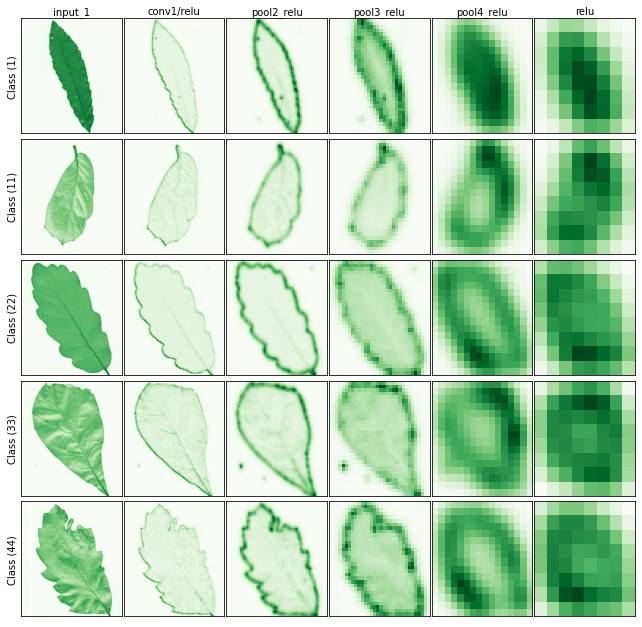

In [37]:
sub_fig_num_rows = len(list_test_images)
sub_fig_num_cols = len(list_target_layer_names)
fig_heigth = 11
fig_width = 11
cmap = "Greens" # PuOr_r, Dark2, Dark2_r, RdBu, RdBu_r, coolwarm, viridis, PiYG, gray, binary, afmhot, PuBu, copper

fig, axes = plt.subplots(sub_fig_num_rows,sub_fig_num_cols, figsize=(fig_width,fig_heigth))
#plt.suptitle(f"Layer {str(layer_no+1)}: {layer_names[layer_no]} {str(current_layer.shape[1:])}", fontsize=20, y=1.1)

for i,ax in enumerate(axes.flat):
    row = i//sub_fig_num_cols
    col = i%sub_fig_num_cols
    #print(f"i={i}; row={row}, col={col}")
#'''
    ax.imshow(list_all_superimposed_activation_image[row][col], cmap=cmap) 
    #ax.imshow(list_all_superimposed_activation_image[row][col]) 
    ax.set_xticks([])
    ax.set_yticks([])
    if col == 0:
        ax.set_ylabel(f"{list_classes[row]}")
    if row == 0:
        #ax.set_xlabel(f"Layer {str(list_layer_indices[col])}") # , rotation=0, ha='right'
        ax.set_xlabel(str(list_target_layer_names[col]))
        #ax.set_xlabel(f"Layer {str(list_layer_indices[col])}: {str(list_target_layer_names[col])}") # , rotation=0, ha='right'
        ax.xaxis.set_label_position('top')
    ax.set_aspect('auto')

plt.subplots_adjust(wspace=0.02, hspace=0.05)
#'''

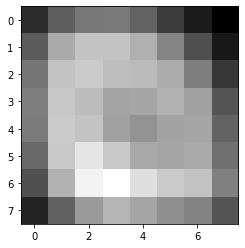

In [38]:
# good cmap for this work: PuOr_r, Dark2_r, RdBu, RdBu_r, coolwarm, viridis, PiYG
'''
for activation_image_index in range(num_neurons):
    plt.imshow(current_layer[0, :, :, activation_image_index], cmap='PiYG')
#'''
plt.imshow(superimposed_activation_image, cmap='gray')

#Weight Visualization:

In [39]:
layer_outputs = [layer.output for layer in model_loaded.layers]
#activation_model = models.Model(inputs=model_loaded.input, outputs=layer_outputs)
#activations = activation_model.predict(input_test)

In [40]:
layer_configs =  []
layer_weights = []

for layer in model_loaded.layers:
    layer_configs.append(layer.get_config())
    layer_weights.append(layer.get_weights())
    
print(f"len(layer_configs) = {len(layer_configs)}")
print(f"len(layer_weights) = {len(layer_weights)}")

len(layer_configs) = 715
len(layer_weights) = 715


In [41]:
layer_configs[-9]

{'activation': 'relu', 'dtype': 'float32', 'name': 'relu', 'trainable': True}

In [42]:
layer_name = 'conv2_block1_1_conv' # conv5_block32_1_conv
model_weight = model_loaded.get_layer(layer_name).get_weights()[0]
#model_biases = model_loaded.get_layer(layer_name).get_weights()[1]

In [43]:
print(f"type(model_weight) = {type(model_weight)}")
print(f"model_weight.shape = {model_weight.shape}")

type(model_weight) = <class 'numpy.ndarray'>
model_weight.shape = (1, 1, 64, 128)


In [44]:
model_weight[0][0].shape

(64, 128)

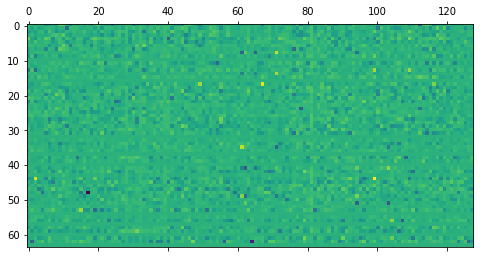

In [45]:
plt.matshow(model_weight[0, 0, :, :], cmap ='viridis')